## Analizador Lexico
Un analizador lexico transforma una entrada en tokens

In [29]:
from enum import Enum

class TipoToken(Enum):  #sistema para clasificación de palabras y conectores
    O = 1
    Y = 2
    S = 3
    N = 4
    E = 5
    P = 6

In [30]:
lexemas = []

def Analizador_lexico(entrada : str) -> list:
    lexemas.clear()
    tokens = entrada.lower().split()
    for token in tokens:
        if token == 'o':
            lexemas.append({"valor": token , "tipo": TipoToken.O })
        elif token == 'y':
            lexemas.append({"valor": token , "tipo": TipoToken.Y})
        elif token == 'si':
            lexemas.append({"valor": token , "tipo": TipoToken.S})
        elif token == 'entonces':
            lexemas.append({"valor": token , "tipo": TipoToken.E})
        elif token == 'no':
            lexemas.append({"valor": token , "tipo": TipoToken.N})
        else :
            lexemas.append({"valor":token , "tipo": TipoToken.P })
            
    return(lexemas)

## Analizador Sintactico

In [31]:
class EstadosAnalizador(Enum):  #Sistema de guardado de Estados
    INICIO = 1
    PRECEDENTE = 2
    NEGACION = 3
    CONSECUENTE = 4
    DISYUNCION = 5
    CONJUNCION = 6
    ATOMO = 7
    ERROR1 = 8  #se esperaba un 'si', 'no' o un atomo
    ERROR2 = 9  #se esperaba un 'no' o un atomo
    ERROR3 = 10 #se esperaba un 'y', 'o', 'entonces' o un atomo
    ERROR4 = 11 #se esperaba un atomo
    ERROR5 = 12 #no se encontro un 'si' antes de 'entonces'
    FIN = 13

In [32]:
l_reglas = []
atomos = []

def Analizador_sintactico(lexemas : list):
    regla = ""
    pila = ""
    prec = 0
    pila = []
    prop = ""

    EstadoActual = EstadosAnalizador.INICIO

#INICIO
    for lexema in lexemas:
        if EstadoActual == EstadosAnalizador.INICIO:
            if lexema['valor'] == "si":
                EstadoActual = EstadosAnalizador.PRECEDENTE
                prec = 1
            elif lexema['valor'] == "no":
                EstadoActual = EstadosAnalizador.NEGACION
                if regla:
                    regla += " "
                regla += "~"
            elif lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
                pila.append(lexema['valor'])
            else:
                EstadoActual = EstadosAnalizador.ERROR1

#Precedente
        elif EstadoActual == EstadosAnalizador.PRECEDENTE:
            if lexema['valor'] == "no":
                EstadoActual = EstadosAnalizador.NEGACION
                if regla:
                    regla += " "
                regla += "~"
            elif lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
                pila.append(lexema['valor'])
            else:
                EstadoActual = EstadosAnalizador.ERROR2

#Negacion
        elif EstadoActual == EstadosAnalizador.NEGACION:
            if lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
                pila.append(lexema['valor'])
            else:
                EstadoActual = EstadosAnalizador.ERROR3

#Consecuente
        elif EstadoActual == EstadosAnalizador.CONSECUENTE:
            if lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
                pila.append(lexema['valor'])
            elif lexema['valor'] == "no":
                EstadoActual = EstadosAnalizador.NEGACION
                if regla:
                    regla += " "
                regla += "~"
            else:
                EstadoActual = EstadosAnalizador.ERROR2

#Atomo
        elif EstadoActual == EstadosAnalizador.ATOMO:
            if lexema['valor'] == "entonces" and prec == 1:
                EstadoActual = EstadosAnalizador.CONSECUENTE
                prop = " ".join(pila)
                atomos.append(prop)
                if regla:
                    regla += " "
                regla += prop
                if regla:
                    regla += " "
                regla += "->"
                pila.clear()
                prop = ""
            elif lexema['valor'] == "y":
                EstadoActual = EstadosAnalizador.CONJUNCION
                prop = " ".join(pila)
                atomos.append(prop)
                if regla:
                    regla += " "
                regla += prop
                if regla:
                    regla += " "
                regla += "&"
                pila.clear()
                prop = ""
            elif lexema['valor'] == "o":
                EstadoActual = EstadosAnalizador.DISYUNCION
                prop = " ".join(pila)
                atomos.append(prop)
                if regla:
                    regla += " "
                regla += prop
                if regla:
                    regla += " "
                regla += "V"
                pila.clear()
                prop = ""
            elif lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
                pila.append(lexema['valor'])
            elif lexema['valor'] == "entonces" and prec == 0:
                EstadoActual = EstadosAnalizador.ERROR5
            else:
                EstadoActual = EstadosAnalizador.ERROR3

#Conjuncion
        elif EstadoActual == EstadosAnalizador.CONJUNCION:
            if lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
                pila.append(lexema['valor'])
            elif lexema['valor'] == "no":
                EstadoActual = EstadosAnalizador.NEGACION
                if regla:
                    regla += " "
                regla += "~"
            else:
                EstadoActual = EstadosAnalizador.ERROR2
                
#Disyuncion
        elif EstadoActual == EstadosAnalizador.DISYUNCION:
            if lexema['tipo'] == TipoToken.P:
                EstadoActual = EstadosAnalizador.ATOMO
                pila.append(lexema['valor'])
            elif lexema['valor'] == "no":
                EstadoActual == EstadosAnalizador.NEGACION
                if regla:
                    regla += " "
                regla += "~"
            else:
                EstadoActual = EstadosAnalizador.ERROR2

#Errores
        elif EstadoActual == EstadosAnalizador.ERROR1:
            print("se esperaba un 'si', 'no' o un atomo")
            regla = ""
            prop = ""
            pila.clear()
            break
        elif EstadoActual == EstadosAnalizador.ERROR2:
            print("se esperaba un 'no' o un atomo")
            regla = ""
            prop = ""
            pila.clear()
            break
        elif EstadoActual == EstadosAnalizador.ERROR3:
            regla = ""
            prop = ""
            pila.clear()
            print("se esperaba un 'y', 'o', 'entonces' o un atomo")
            break
        elif EstadoActual == EstadosAnalizador.ERROR4:
            print("se esperaba un atomo")
            regla = ""
            prop = ""
            pila.clear()
            break
        elif EstadoActual == EstadosAnalizador.ERROR5:
            print("no se encontro un 'si' antes de 'entonces'")
            regla = ""
            prop = ""
            pila.clear()
            break
        else:
            EstadoActual == EstadosAnalizador.FIN

#Salida sin errores
    if EstadoActual != (EstadosAnalizador.ERROR1 and EstadosAnalizador.ERROR2 and EstadosAnalizador.ERROR3 and EstadosAnalizador.ERROR4 and EstadosAnalizador.ERROR5):
        prop = " ".join(pila)
        atomos.append(prop)
        if regla and prop:
            regla += " " + prop
        else:
            regla = prop
        l_reglas.append(regla)
        prop = ""
        pila.clear()
        regla = ""
        print("proposicion valida")
    
    return(l_reglas, atomos)

In [33]:
Palabras = []
l_reglas.clear()
lexemas.clear()
atomos.clear()

frases = [
    "Si es de dia o es de noche entonces existo",
    "Es de dia"]

for frase in frases:
    Palabras.clear()
    Palabras = Analizador_lexico(frase)
    Analizador_sintactico(Palabras)

print(l_reglas)
print(atomos)

proposicion valida
proposicion valida
['es de dia V es de noche -> existo', 'es de dia']
['es de dia', 'es de noche', 'existo', 'es de dia']


## Prueba de lectura de archivos

In [34]:
Palabras = []
l_reglas.clear()
lexemas.clear()
atomos.clear()

with open("reglas-texto.txt", "r") as archivo:
    lineas = archivo.readlines()

erease = "\n"
enun = []
for linea in lineas:
    ent = linea.replace(erease, "")
    enun.append(ent)

for frase in enun:
    Palabras.clear()
    Palabras = Analizador_lexico(frase)
    Analizador_sintactico(Palabras)
        

proposicion valida
proposicion valida
proposicion valida
proposicion valida
proposicion valida
proposicion valida
proposicion valida
proposicion valida
proposicion valida
proposicion valida


## Elimina atomos repetidos en la lista de atomos

In [35]:
seen = set()
atomos_unicos = []

for atomo in atomos:
    if atomo not in seen:
        atomos_unicos.append(atomo)
        seen.add(atomo)

## Reemplaza los atomos con sus numeros en la regla

In [36]:
reglasx = []
NoPrep : str

for regla in l_reglas:
    temp = regla
    for index, atomo in enumerate(atomos_unicos):
        NoPrep = "P" + str(index)
        if atomo in regla:
            temp = temp.replace(atomo, NoPrep)
    reglasx.append(temp)

reglasx

['~ P0 -> ~ P1 V ~ P2 V ~ P3',
 'P4 V P5 -> P6 V P7',
 '~ P2 -> P1 V P3',
 'P8 -> P1 V P9',
 'P10 & ~ P0 -> P11',
 'P12 -> P13 V P6',
 'P14 & ~ P11 V ~ P9 -> P15 V P16',
 'P17 -> P16 V P1 V P18',
 'P19 -> P13 V P11 V P9',
 'P20 -> P6 V P3']

## Grafos de las reglas

In [41]:
import re
from graphviz import Digraph

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def parse_expression(expression):
    # Actualizar la expresión regular para los nuevos operadores y para combinar ~ con el operando
    expression = re.sub(r'~\s+', '~', expression)
    tokens = re.findall(r'~?\w+|->|&|V', expression)
    return tokens

def build_tree(tokens):
    # Manejar el consecuente como raíz
    if '->' in tokens:
        index = tokens.index('->')
        left_expr = tokens[:index]
        right_expr = tokens[index + 1:]
        root = Node('->')
        root.left = build_tree(left_expr)
        root.right = build_tree(right_expr)
        return root

    # Función para manejar operadores binarios
    def parse_tokens(tokens):
        # Prioridad: V -> &
        # Primero manejar &
        while '&' in tokens:
            index = tokens.index('&')
            left = tokens[:index]
            right = tokens[index + 1:]
            node = Node('&')
            node.left = parse_tokens(left)
            node.right = parse_tokens(right)
            return node

        # Luego manejar V
        while 'V' in tokens:
            index = tokens.index('V')
            left = tokens[:index]
            right = tokens[index + 1:]
            node = Node('V')
            node.left = parse_tokens(left)
            node.right = parse_tokens(right)
            return node
        
        # Manejar la negación como un operador unario
        if tokens[0].startswith('~'):
            node = Node(tokens[0])
            return node
        else:   # Operando simple
            return Node(tokens[0])

    return parse_tokens(tokens)

def visualize_tree(node):
    dot = Digraph()
    def add_nodes_edges(node):
        if node is not None:
            dot.node(str(id(node)), node.value)
            if node.left:
                dot.edge(str(id(node)), str(id(node.left)))
                add_nodes_edges(node.left)
            if node.right:
                dot.edge(str(id(node)), str(id(node.right)))
                add_nodes_edges(node.right)
    add_nodes_edges(node)
    return dot

def process_expressions(expressions):
    for i, expression in enumerate(expressions):
        tokens = parse_expression(expression)
        tree = build_tree(tokens)
        dot = visualize_tree(tree)
        dot.render(f'logic_tree_{i}', format='png', view=False)

process_expressions(reglasx)


## Arbol binario

In [10]:
class Arbol:
    # Funciones privadas
    def __init__(self, dato):
        self.raiz = Nodo(dato)

    def __agregar_recursivo(self, nodo, dato):
        if dato < nodo.dato:
            if nodo.izquierda is None:
                nodo.izquierda = Nodo(dato)
            else:
                self.__agregar_recursivo(nodo.izquierda, dato)
        else:
            if nodo.derecha is None:
                nodo.derecha = Nodo(dato)
            else:
                self.__agregar_recursivo(nodo.derecha, dato)

    def __inorden_recursivo(self, nodo):
        if nodo is not None:
            self.__inorden_recursivo(nodo.izquierda)
            print(nodo.dato, end=", ")
            self.__inorden_recursivo(nodo.derecha)

    def __preorden_recursivo(self, nodo):
        if nodo is not None:
            print(nodo.dato, end=", ")
            self.__preorden_recursivo(nodo.izquierda)
            self.__preorden_recursivo(nodo.derecha)

    def __postorden_recursivo(self, nodo):
        if nodo is not None:
            self.__postorden_recursivo(nodo.izquierda)
            self.__postorden_recursivo(nodo.derecha)
            print(nodo.dato, end=", ")

    def __buscar(self, nodo, busqueda):
        if nodo is None:
            return None
        if nodo.dato == busqueda:
            return nodo
        if busqueda < nodo.dato:
            return self.__buscar(nodo.izquierda, busqueda)
        else:
            return self.__buscar(nodo.derecha, busqueda)

    # Funciones públicas

    def agregar(self, dato):
        self.__agregar_recursivo(self.raiz, dato)

    def inorden(self):
        print("Imprimiendo árbol inorden: ")
        self.__inorden_recursivo(self.raiz)
        print("")

    def preorden(self):
        print("Imprimiendo árbol preorden: ")
        self.__preorden_recursivo(self.raiz)
        print("")

    def postorden(self):
        print("Imprimiendo árbol postorden: ")
        self.__postorden_recursivo(self.raiz)
        print("")

    def buscar(self, busqueda):
        return self.__buscar(self.raiz, busqueda)

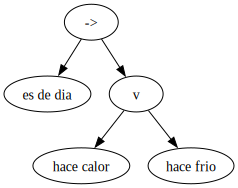

In [11]:
import graphviz
from IPython.display import display

class Node:
    def __init__(self, value):
        self.value = value
        self.children = []

    def add_child(self, child):
        self.children.append(child)
def generate_tree():
    # Crear el árbol de expresiones
    root = Node('->')
    node1 = Node('es de dia')
    node2 = Node('v')
    node3 = Node('hace calor')
    node4 = Node('hace frio')

    root.add_child(node1)
    root.add_child(node2)
    node2.add_child(node3)
    node2.add_child(node4)

    return root
def visualize_tree(root):
    dot = graphviz.Digraph()

    def traverse(node):
        dot.node(str(id(node)), node.value)
        for child in node.children:
            dot.edge(str(id(node)), str(id(child)))
            traverse(child)

    traverse(root)
    display(dot)
root = generate_tree()
visualize_tree(root)